# Práctico 1: Introducción al aprendizaje por refuerzos
Milagros Ávila (miluavila@gmail.com)

Fidel Scarinci (ignacio.scarinci@gmail.com)

Juan Porta (jporta.09@gmail.com)

## Actividades

1. Implementar y ejecutar el algoritmo SARSA en "The Cliff".

2. Implementar y ejecutar el algoritmo Q-Learning en "The Cliff". ¿Cómo converge con respecto a SARSA? ¿A qué se debe? Comentar.

3. Ejecutando con distintos híper-parámetros, realizar una breve descripción sobre cómo afectan a la convergencia los distintos valores de $\alpha$, $\epsilon$ y $\gamma$.

4. (Opcional) Implementar política de exploración Softmax, en donde cada acción tiene una probabilidad $$\pi(a 
\mid s) = \frac{e^{Q(s,a)/\tau}}{\sum_{\dot{a} \in A}e^{Q(s,\dot{a})/\tau}}$$

Para dejar el lab listo para su corrección, dejar link a repo de github con un notebook ejecutando el agente en la planilla enviada en Slack.

#### El Entonrno: The Cliff

![](images/cliffwalking.png)

donde S= starting point, G= goal
(imagen de Sutton y Barto, 2018)

Descripción del entorno:

Acciones:

* ^ - Arriba
* v - Abajo
* \> - Derecha
* < - Izquierda

Función de recompensa:

* $-1$ en todos los demás estados 
* $-100$ en el acantilado

Nota: caer en el acantilado devuelve al agente al estado inicial en un mismo episodio

#### Librerías

In [1]:
import matplotlib.pyplot as plt
import itertools
import gym
import numpy as np
from agents.utils.plotting import plot_reward_per_episode, plot_steps_per_episode, plot_steps_per_episode_smooth, draw_value_matrix

## Modelo

Definimos el método de *elección de acciones*.
En este caso el mismo utiliza la política de exploración $\epsilon$-greedy.

In [2]:
def choose_action(state):

    """
    Chooses an action according to the learning previously performed 
    using an epsilon-greedy exploration policy
    """
    
    q_values = [q.get((state, a), 0.0) for a in actions]
    max_q = max(q_values)

    if random_state.uniform() < epsilon:
        return random_state.choice(actions)  # a random action is selected

    count = q_values.count(max_q)

    # In case there're several state-action max values
    # we select a random one among them
    if count > 1:
        best = [i for i in range(len(actions)) if q_values[i] == max_q]
        i = random_state.choice(best)
    else:
        i = q_values.index(max_q)

    return actions[i]

Definimos el esqueleto del método *learn*, el cuál toma una transición y cambia el dict de los valores de Q de acuerdo a algún algoritmo.
Lo hacemos con los algoritmos *SARSA* y *Q-Learning*.

In [3]:
def sarsa(state, action, reward, next_state, next_action):

    """
    Performs a SARSA update for a given state transition
    """
    
    q_prev = q.get((state, action), 0.0)
    q_next = q.get((next_state, next_action), 0.0)
    q[state, action] = q_prev + alpha  * (reward + gamma * q_next - q_prev)
    
    pass

def qlearning(state, action, reward, next_state, next_action):

    """
    Performs a Q-Learning update for a given state transition
    """
    q_prev = q.get((state, action), 0.0)
    q_values = [q.get((next_state, a), 0.0) for a in actions]
    q_next = max(q_values)
    q[state, action] = q_prev + alpha  * (reward + gamma * q_next - q_prev)
    
    pass

Finalmente, definimos el *método principal* de iteraciones. 

In [4]:
def run(learn):
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        action = choose_action(state)
        
        while not done:

            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action(next_state)
            

            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learn(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learn(state, action, reward, next_state, next_action)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

Definidos los métodos básicos, procedemos a instanciar a nuestro agente.

In [5]:
q = {}

# definimos sus híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

## Ejecución

Ya instanciado, ejecutamos nuestro agente.
Notar que aquí podemos elegir si ejecutamos con el algoritmo *SARSA* o *Q-Learning*

In [6]:
avg_steps_per_episode, timesteps_ep, reward_ep = run(sarsa)

## Análisis de convergencia

Recompensa por episodio, pasos por episodio, pasos por episodio suavizado y matriz de mejor acción-valor

    * plot_reward_per_episode(reward_ep)
    * plot_steps_per_episode(timesteps_ep)
    * plot_steps_per_episode_smooth(timesteps_ep)
    * draw_value_matrix(q)

## Resultados

### Algoritmo SARSA

En primer lugar,visualizamos la recompensa por episodio, pasos por episodio (suavizado) y la matriz de mejor acción-valor para hiperparámetros con los siguientes valores:

* $\alpha$ = 0.5
* $\epsilon$ = 0.1
* $\gamma$ = 1

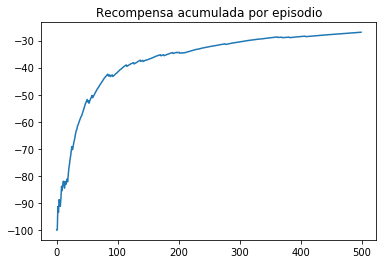

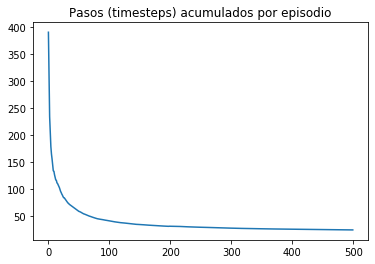

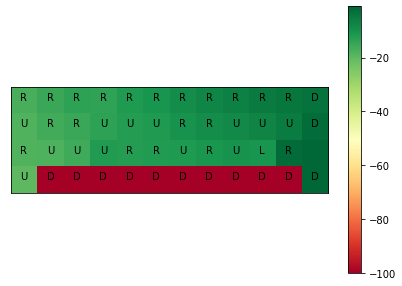


 Matriz de mejor acción-valor (en números): 

 [[ -17.23954428  -15.14316652  -13.47940719  -13.86734791  -11.50591433
   -10.42824021   -8.92910114   -7.36906975   -6.09772006   -5.02260286
    -4.246717     -3.48743802]
 [ -18.17688817  -16.29163152  -15.09887514  -13.57191616  -12.57200446
   -11.46204211  -10.28051994   -8.75636874   -8.02140089   -7.17268501
    -5.41325753   -2.24362335]
 [ -18.16818774  -17.96726471  -16.02741607  -12.12753358  -12.36502775
   -11.94064567  -11.56233996  -10.96253903   -9.96154144  -10.28531687
    -2.00258599   -1.        ]
 [ -19.72790699 -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.           -1.        ]]


(None, None, None)

In [7]:
plot_reward_per_episode(reward_ep), plot_steps_per_episode_smooth(timesteps_ep), draw_value_matrix(q)

Lo que se puede observar es que a partir de los 250 episodios (aproximadamente) la recompensa supera el valor de -30 mientras que la cantidad de pasos por episodio disminuye a 50 después de los 100 episodios.
Por su parte, la matriz de mejor acción-valor muestra en la fila de arriba todas acciones que llevan el camino hacia la derecha. La segunda y tercera fila muestran acciones que van tanto hacia arriba como hacia la derecha, exceptuando un solo sitio donde se va hacia la izquierda.

Estudiamos cómo afectan los hiperparámetros a los resultados obtenidos.
Para ello, modificamos sus valores y estudiamos comparando con resultados obtenidos previamente.

#### Hiperparámetro $\alpha$
para los valores $\alpha$ = 0.01 y 0.1 (con $\gamma$ = 1 y $\epsilon$ = 0.1)

##### $\alpha$ = 0.1

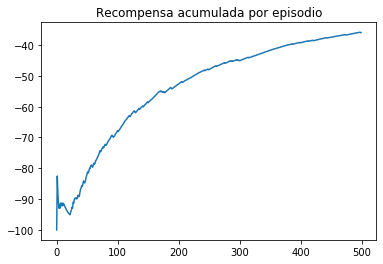

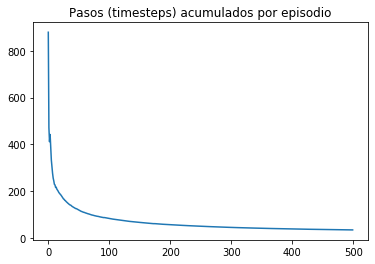

In [8]:
q = {}

alpha = 0.1
gamma = 1
epsilon = 0.1

avg_steps_per_episode, timesteps_ep, reward_ep = run(sarsa)

plot_reward_per_episode(reward_ep)
plot_steps_per_episode_smooth(timesteps_ep)

env.close()

##### $\alpha$ = 0.01

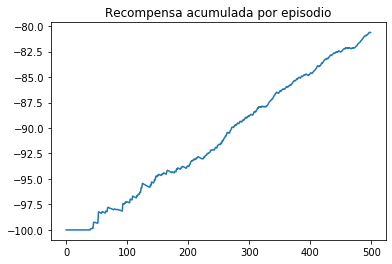

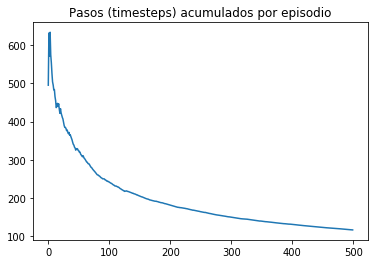

In [9]:
q = {}

alpha = 0.01
gamma = 1
epsilon = 0.1

avg_steps_per_episode, timesteps_ep, reward_ep = run(sarsa)

plot_reward_per_episode(reward_ep)
plot_steps_per_episode_smooth(timesteps_ep)

A partir de los resultados obtenidos, es claro que el hiperparámetro $\alpha$ tiene como efecto acelerar el proceso de aprendizaje del modelo.
Se observa que con valores de $\alpha$ creciente se alcanzan valores de recompensa mayores con menor cantidad de episodios.
Asimismo y en concordancia, la cantidad de pasos acumulados por episodio disminuye a menos de 50 para el mayor valor de $\alpha$ en 200 episodios.

#### Hiperparámetro $\epsilon$
para los valores $\epsilon$ = 0.5 y 0.05 (con $\gamma$ = 1 y $\alpha$ = 0.5).

##### $\epsilon$ = 0.5

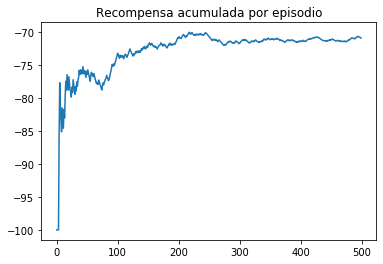

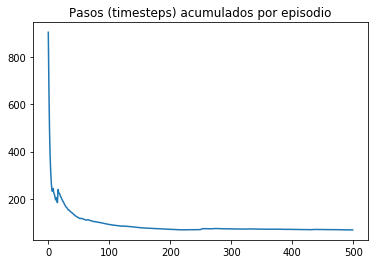

In [11]:
q = {}

alpha = 0.5
gamma = 1
epsilon = 0.5

avg_steps_per_episode, timesteps_ep, reward_ep = run(sarsa)

plot_reward_per_episode(reward_ep)
plot_steps_per_episode_smooth(timesteps_ep)

##### $\epsilon$ = 0.05

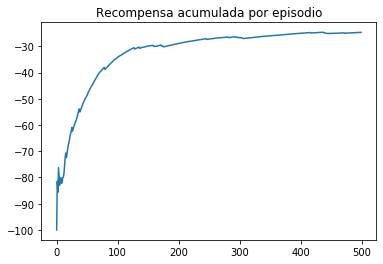

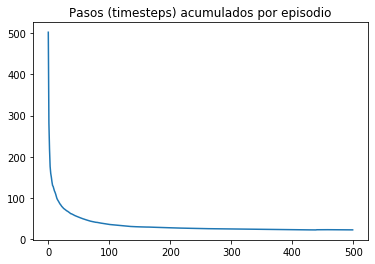

In [12]:
q = {}

alpha = 0.5
gamma = 1
epsilon = 0.05

avg_steps_per_episode, timesteps_ep, reward_ep = run(sarsa)

plot_reward_per_episode(reward_ep)
plot_steps_per_episode_smooth(timesteps_ep)

El hiperparámetro $\epsilon$ define cómo incurre el agente al momento de elegir entre distintas acciones: para valores bajos se opta por elegir una acción (a priori óptima) cuyos efectos son conocidos esperando obtener un resultados similar (*explotar*); por su parte, para valores altos se opta por elegir acciones (posiblemente no óptimas) cuyos efectos son desconocidos, pero que pueden conducir a aprender más (*explorar*).

En este caso, se observa que con $\epsilon$ creciente hay mayor ruido para los primeros 100 episodios. Esto se puede atribuir al hecho que el agente 'explora' más de lo que explota.
Mientras que para $\epsilon$ decreciente no se observan grandes diferencias con el primer modelo.

#### Hiperparámetro $\gamma$
para los valores $\gamma$ = 0.5 (con $\epsilon$ = 0.1 y $\alpha$ = 0.5).

##### $\gamma$ = 0.5

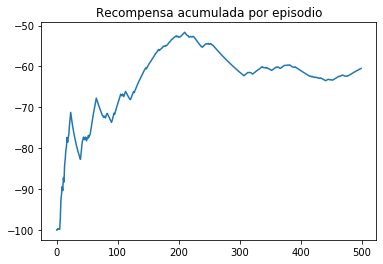

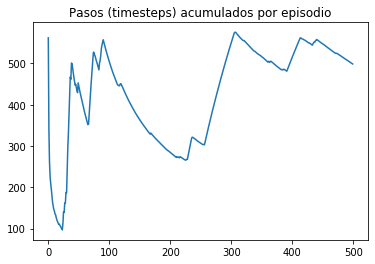

In [13]:
q = {}

alpha = 0.5
gamma = 0.5
epsilon = 0.1

avg_steps_per_episode, timesteps_ep, reward_ep = run(sarsa)

plot_reward_per_episode(reward_ep)
plot_steps_per_episode_smooth(timesteps_ep)

A partir de los resultaods obtenidos, se puede ver que con un valor menor de $\gamma$ la convergencia de las curvas tiene peor rendimiento comparando con los resultados de arriba.
Se puede ver que converge a recompensas mayores de -100 y a pasos acumulados mayores a 500.
Además, los resultados presentan mucho ruido y variaciones.

### Algoritmo Q-Learning

Estudiamos el desempeño del algoritmo *Q-Learning* en comparación con el algoritmo *SARSA* para mismo valores de hiperparámetros y 1000 episodios.

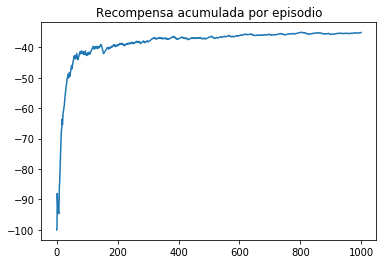

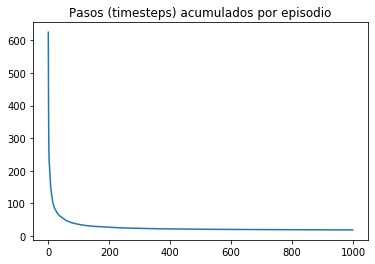

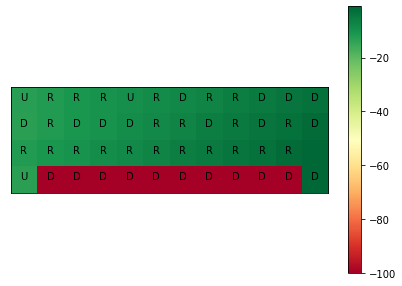


 Matriz de mejor acción-valor (en números): 

 [[ -12.66136343  -11.84747907  -11.02784252  -10.27908777   -9.39229073
    -8.63558329   -7.7250166    -6.84749179   -5.90557249   -4.97144521
    -3.99215235   -2.99985494]
 [ -12.99954428  -11.99998205  -10.99999703   -9.99999965   -8.99999999
    -8.           -7.           -6.           -5.           -4.
    -3.           -2.        ]
 [ -12.          -11.          -10.           -9.           -8.
    -7.           -6.           -5.           -4.           -3.
    -2.           -1.        ]
 [ -13.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.           -1.        ]]


In [14]:
q = {}

alpha = 0.5
gamma = 1
epsilon = 0.1

episodes_to_run = 1000

avg_steps_per_episode, timesteps_ep, reward_ep = run(qlearning)

plot_reward_per_episode(reward_ep)
plot_steps_per_episode_smooth(timesteps_ep)
draw_value_matrix(q)

#### Análisis y comparación de algoritmos
El algoritmo de *Q-Learning*, como se observa en los resultados, aprende correctamente el camino **óptimo** sobre el borde del precipicio, sin embargo puede caer a menudo.
Por su parte, el algoritmo *SARSA* aprende el camino **más seguro** sobre la fila de arriba.
Esto se puede observar comparando las matrices de acción-valor de ambos modelos.

Dado que *SARSA* aprende el camino más seguro, presenta una recompensa mayor por episodio que *Q-Learning*, aunque no camine el camino óptimo.
Estos valores se pueden observar en las curvas de recompensa por episodios.

Con respecto a la cantidad de pasos por episodio, los distintos algoritmos no presentan diferencias sustanciales.